<b>
<br>
<font size="5"><p style="text-align: center;">Introdução à Programação de Computadores</p></font>
<br>
<font size="5"><p style="text-align: center;">Atividade Interativa #10</p></font>
</b>
<br><br>
<font size="4"><b>Professores:</b>
<br>
Cristiano Rodrigues
<br>
Matheus Pereira
<br>
Jefersson A. dos Santos - jefersson@dcc.ufmg.br
<br><br>
</font>
<hr>
<br>
<font size="3">
</font>

# Estatísticas sobre gastos parlamentares 
------------------

# 1. Introdução

---------------

A Cota para o Exercício da Atividade Parlamentar – CEAP (antiga verba indenizatória) é uma cota única mensal destinada a custear os gastos dos deputados exclusivamente vinculados ao exercício da atividade parlamentar.

Nessa atividade prática você deverá implementar uma série de funções para geração de gráficos sobre os gastos parlamentares utilizando os dados publicamente disponíveis sobre as despesas do [CEAP](https://dadosabertos.camara.leg.br/swagger/api.html "Arquivos - Despesas pela Cota para Exercício da Atividade Parlamentar"). 


Você pode baixar os arquivos CSV do [site](https://dadosabertos.camara.leg.br/swagger/api.html) para a pasta **dados_parlamento** dentro do diretório onde se encontra o seu notebook (arquivo com extensão ipynb)

Não altere o nome dos arquivos:
* Ano-2009.csv
* Ano-2010.csv
* Ano-2011.csv
* Ano-2012.csv
* Ano-2013.csv
* Ano-2014.csv
* Ano-2015.csv
* Ano-2016.csv
* Ano-2017.csv

As suas funções para leitura dos arquivos devem utilizar caminhos relativos.<br>
Ou seja, para a leitura dos dados do arquivo Ano-2009.csv, por exemplo, o nome do arquivo passado para a função *open* deve ser "dados_parlamento/Ano-2009.csv". 

Não utilizar o caminho absoluto (por exemplo "C:\usuarios\m1011\documents\tp2\dados_parlamento\Ano-2009.csv") pois isso provavelmente impedirá que seu trabalho funcione em outra máquina além da sua.

# 2. O que deve ser feito
---------------

Para manipulação dos dados, você deverá implementar pelo menos (sendo permitida a implementação de outras funções, caso necessário):
<ol>
<li>Uma função para leitura dos dados. **Atenção:** (1) Observe que os dados estão codificados em formato UTF-8; (2) Observe que os arquivos são grandes. Talvez não seja uma boa ideia ler tudo e colocar em uma única lista. **FEITO!**</li>
<li>Uma função que retorna uma lista com os gastos totais da Câmara dos Deputados em um intervalo ('ano início' até 'ano fim').</li>
<li>Uma função que retorna uma lista com os gastos totais de todos os parlamentares em um ano específico.</li>
<li>Uma função que retorna os gastos médios totais dos parlamentares por partido para um ano específico.</li>
<li>Uma função que retorna os gastos médios totais dos parlamentares por estado para um ano específico.</li>
</ol>

As funções deverão ser utilizadas para plotar:
<ol>
<li>Um gráfico ilustrando a evolução dos gastos das cotas da Câmara dos Deputados entre 2009 e 2019.</li>
<li>Um histograma mostrando o total dos 20 parlamentares que mais gastaram em 2019.</li>
<li>Um histograma por partido, mostrando os gastos médios de seus parlamentares no ano de 2019.</li>
<li>Um histograma por estado, mostrando os gastos médios de seus parlamentares ano de 2019.</li>
</ol>

No final, você deverá utilizar os gráficos para responder as seguintes perguntas:
<ol>
<li>Houve alguma redução nos gastos com o CEAP nos últimos anos em que o país vive uma crise de arrecadação?</li>
<li>Quais os parlamentares mais caros no exercício de 2019?</li>
<li>Quais os partidos que, na média, mais "custam" para o Brasil em termos de auxílios a parlamentares?</li>
<li>Quais os estados, na média, mais "custam" para o Brasil em termos de auxílios a parlamentares? Pelas regras de liberação dos auxílios para viagem, o esperado é que os estados mais distantes do DF custem mais. </li>
</ol>




In [ ]:
# Criando a pasta
!mkdir dados_parlamentares

# Baixando os dados de 2019
!wget http://www.camara.leg.br/cotas/Ano-2019.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2018.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2017.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2016.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2015.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2014.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2013.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2012.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2011.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2010.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2009.csv.zip

!unzip Ano-2019.csv.zip
!unzip Ano-2018.csv.zip
!unzip Ano-2017.csv.zip
!unzip Ano-2016.csv.zip
!unzip Ano-2015.csv.zip
!unzip Ano-2014.csv.zip
!unzip Ano-2013.csv.zip
!unzip Ano-2012.csv.zip
!unzip Ano-2011.csv.zip
!unzip Ano-2010.csv.zip
!unzip Ano-2009.csv.zip

!mv *.csv dados_parlamentares/


In [2]:
# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo. 
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica. 
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    #file = open(filename, 'r', encoding='ISO-8859-1')
    file = open(filename, 'r', encoding='UTF-8')
    
    # Criando uma lista vazia para armazenar todos os dados do arquivo
    dados = []
    
    # Para cada linha do arquivo, realizamos as seguintes operacoes: 
    # (1) removemos o caractere '\n' do final da linha
    # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
    # (3) removemos as aspas extras
    # (4) transformamos a linha em uma lista
    # (5) adicionamos a lista de itens na lista 'dados'
    for line in file:
        #dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        dados.append(line.rstrip().replace('","','";"').split('";"'))
        dados[-1][0]=dados[-1][0].replace('"','')
        dados[-1][-1]=dados[-1][-1].replace('"','')
        
    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)
    
    return rotulos, dados



In [3]:
############# BLOCO PRINCIPAL DO PROGRAMA #############
# Apenas um teste. Fique a vontade para alterar ou apagar esse trecho de código.
rotulos, dados = le_dados("dados_parlamentares/Ano-2019.csv")

print (rotulos, "\n")
print(dados[0], "\n")

print ("Nome do parlamentar: ", dados[0][0])
print ("Número total de registros: %d\n" % (len(dados)))

['\ufefftxNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar', 'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota', 'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao', 'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento', 'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes', 'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote', 'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento', 'urlDocumento'] 

['LID.GOV-CD', '', '', '', '2015', 'NA', '', '55', '13', 'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR', '0', '', 'CRISTIANE FERREIRA EPP', '037.139.030/0010-8', '693', '4', '2019-01-16T00:00:00', '111.3', '0', '111.3', '1', '2019', '0', '', '', '1554246', '', '', '2812', '6738121', 'https://www.camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6738121'] 

Nome do parlamentar:  LID.GOV-CD
Número total de registros: 289452



In [4]:
# Uma função que retorna uma lista com os gastos totais de todos
# os parlamentares em um ano específico.
# nome do parlamentar -> gastou

def gasto_total_ano(ano):
    rotulos, dados = le_dados("dados_parlamentares/Ano-"+ str(ano) +".csv")
    gastos_p = dict() #{}
    for linha in dados:
        nome = linha[0]
        gasto = float(linha[19])
        
        if nome in gastos_p:
            # adicionar
            gastos_p[nome] = gastos_p[nome] + gasto
        else:
            # criar
            gastos_p[nome] = gasto
            
    print(f'Gastos totais de todos os parlamentares em {ano}: {sum(gastos_p.values())}')
    return gastos_p

gasto_total_ano(2019)


Gastos totais de todos os parlamentares em 2019: 211372517.2299999


{'LID.GOV-CD': 11321.43,
 'LIDERANÇA DO AVANTE': 38077.16000000001,
 'LIDERANÇA DO CIDADANIA': 29514.929999999993,
 'LIDERANÇA DO DEMOCRATAS': 17593.33,
 'LIDERANÇA DO NOVO': 9299.880000000001,
 'LIDERANÇA DO PARTIDO REPUBLICANO DA ORDEM SOCIAL': 59600.0,
 'LIDERANÇA DO PDT': 120731.8,
 'LIDERANÇA DO PODEMOS': 56904.160000000025,
 'LIDERANÇA DO PROGRESSISTAS': 24000.0,
 'LIDERANÇA DO PSD': 76127.76999999999,
 'LIDERANÇA DO PSDB': 96146.54999999999,
 'LIDERANÇA DO PSOL': 4841.0,
 'LIDERANÇA DO PT': 243605.45000000004,
 'LIDERANÇA DO PTB': 35042.20999999999,
 'LIDERANÇA DO SOLIDARIEDADE': 65330.329999999994,
 'LIDMIN': 32529.539999999997,
 'SILVIO COSTA': 40613.60999999998,
 'IZALCI LUCAS': 31064.469999999998,
 'Danilo Forte': 43131.07,
 'MARIA HELENA': 41977.669999999984,
 'Norma Ayub': 268581.3100000003,
 'Fausto Pinato': 421568.00999999954,
 'Iracema Portella': 468713.0499999996,
 'JÚLIA MARINHO': 20485.16,
 'Fábio Henrique': 441775.1499999994,
 'Bacelar': 457900.41999999946,
 'Felipe

In [5]:
# Returna a soma dos gastos totais de parlamentares em um intervalo de anos
def gastos_totais_intervalo(ano_inicial, ano_final):
    gastos_totais = []
    for ano in range(ano_inicial, ano_final+1):
        gastos_totais.append(sum(gasto_total_ano(ano).values()))
    return sum(gastos_totais)

print(gastos_totais_intervalo(2018, 2019))

Gastos totais de todos os parlamentares em 2018: 215427530.7899998
Gastos totais de todos os parlamentares em 2019: 211372517.2299999
426800048.01999974


In [6]:
#Uma função que retorna os gastos médios totais dos parlamentares por partido para um ano específico.
def gastos_medios_totais_ano(ano):
    rotulos, dados = le_dados("dados_parlamentares/Ano-"+ str(ano) +".csv")
    gastos_medios = dict()
    partidos = dict()

    #quantidade de parlamentares por partido        
    for linha in dados:
        partido = linha[6]
        
        if partido in partidos:
            partidos[partido] = partidos[partido] + 1
        else:
            partidos[partido] = 1
            
    #criar dicionario de partidos e gastos totais dos parlamentares
    for linha in dados:
        partido = linha[6]
        gasto = float(linha[19])

        if partido in gastos_medios:
            # adicionar
            gastos_medios[partido] = gastos_medios[partido] + gasto
            
        else:
            # criar
            gastos_medios[partido] = gasto
            
            
    #calculo dos gastos medios por partido
    for partido in gastos_medios:
        gastos_medios[partido] = gastos_medios[partido]/partidos[partido]
        
    print(partidos) #Dicionario com a quantidade de parlamentares por partido
    print(gastos_medios) #Dicionario com os gastos medios por partido

    
    return gastos_medios


gastos_medios_totais_ano(2019)

{'': 905, 'AVANTE': 3745, 'PSDB': 13744, 'MDB': 20635, 'DEM': 1156, 'PP': 29956, 'PSC': 4430, 'UNIÃO': 27025, 'PODE': 4997, 'PV': 2394, 'PSB': 14493, 'PT': 40696, 'PRB': 531, 'REPUBLICANOS': 21427, 'PTB': 2153, 'PDT': 10853, 'CIDADANIA': 3517, 'PPS': 225, 'PSOL': 4787, 'SOLIDARIEDADE': 3893, 'PSD': 25996, 'PCdoB': 3947, 'PR': 1118, 'PL': 36858, 'PSL': 137, 'PROS': 3045, 'S.PART.': 158, 'REDE': 789, 'PATRI': 154, 'PHS': 139, 'NOVO': 3130, 'PPL': 20, 'PATRIOTA': 2399}
{'': 1017.3099889502756, 'AVANTE': 573.3316608811772, 'PSDB': 720.189550349249, 'MDB': 787.7282078991998, 'DEM': 1008.7270328719717, 'PP': 739.8381482841836, 'PSC': 830.2919277652302, 'UNIÃO': 746.1366797409802, 'PODE': 749.4399519711849, 'PV': 748.7273558897313, 'PSB': 633.4920437452527, 'PT': 604.2504867800554, 'PRB': 1169.674538606403, 'REPUBLICANOS': 850.8800504037065, 'PTB': 995.1258941012599, 'PDT': 751.2100783193649, 'CIDADANIA': 577.4611487062845, 'PPS': 970.7530222222227, 'PSOL': 662.2529663672477, 'SOLIDARIEDADE':

{'': 1017.3099889502756,
 'AVANTE': 573.3316608811772,
 'PSDB': 720.189550349249,
 'MDB': 787.7282078991998,
 'DEM': 1008.7270328719717,
 'PP': 739.8381482841836,
 'PSC': 830.2919277652302,
 'UNIÃO': 746.1366797409802,
 'PODE': 749.4399519711849,
 'PV': 748.7273558897313,
 'PSB': 633.4920437452527,
 'PT': 604.2504867800554,
 'PRB': 1169.674538606403,
 'REPUBLICANOS': 850.8800504037065,
 'PTB': 995.1258941012599,
 'PDT': 751.2100783193649,
 'CIDADANIA': 577.4611487062845,
 'PPS': 970.7530222222227,
 'PSOL': 662.2529663672477,
 'SOLIDARIEDADE': 907.2053454919113,
 'PSD': 716.4253177412006,
 'PCdoB': 927.8381048897933,
 'PR': 1090.135688729877,
 'PL': 732.4495946606237,
 'PSL': 1095.606715328467,
 'PROS': 930.1557110016504,
 'S.PART.': 1375.1105696202542,
 'REDE': 914.3399366286435,
 'PATRI': 1050.2456493506504,
 'PHS': 1295.3632374100732,
 'NOVO': 269.4390670926518,
 'PPL': 2246.2875000000004,
 'PATRIOTA': 799.8056273447268}

In [7]:
#Uma função que retorna os gastos médios totais dos parlamentares por estado para um ano específico.
def gastos_medios_dos_parlamentares_por_estados_ano_especifico(ano):
    rotulos, dados = le_dados("dados_parlamentares/Ano-"+ str(ano) +".csv")
    gastos_estados = dict()
    estados = dict()
    gastos_medios = dict()

    #quantidade de parlamentares por estado        
    for linha in dados:
        estado = linha[5]
        
        if estado in estados:
            estados[estado] = estados[estado] + 1
        else:
            estados[estado] = 1
            
    #criar dicionario de estados e gastos totais dos parlamentares
    for linha in dados:
        estado = linha[5]
        gasto = float(linha[19])

        if estado in gastos_estados:
            gastos_estados[estado] = gastos_estados[estado] + gasto
        else:
            gastos_estados[estado] = gasto
            
            
    #calculo dos gastos medios por estado
    for estado in gastos_estados:
        if estado in gastos_medios:
            gastos_medios[estado] = gastos_medios[estado]/estados[estado]
        else:
            gastos_medios[estado] = gastos_estados[estado]/estados[estado]
        
    print(estados) #Dicionario com a quantidade de parlamentares por estado
    print(gastos_estados) #Dicionario com os gastos medios por estado
    
    return gastos_medios

gastos_medios_dos_parlamentares_por_estados_ano_especifico(2019)

{'NA': 905, 'PE': 14990, 'DF': 1445, 'CE': 10305, 'RR': 2910, 'ES': 4833, 'SP': 44304, 'PI': 4087, 'PA': 8037, 'SE': 3367, 'BA': 22929, 'RJ': 26610, 'PR': 21567, 'RS': 25106, 'MG': 33560, 'GO': 5300, 'SC': 10433, 'MA': 7373, 'AP': 2777, 'AC': 3386, 'PB': 6393, 'AL': 3698, 'AM': 2955, 'RO': 3517, 'TO': 4445, 'MS': 4056, 'RN': 5168, 'MT': 4996}
{'NA': 920665.5399999995, 'PE': 10989237.3399998, 'DF': 1795185.1600000015, 'CE': 10510221.37000014, 'RR': 4115517.9900000235, 'ES': 3652049.540000036, 'SP': 25646417.04000091, 'PI': 4590257.089999993, 'PA': 8026741.859999843, 'SE': 3687619.6000000127, 'BA': 17430621.460000604, 'RJ': 17856044.25000075, 'PR': 12413012.859999903, 'RS': 12470844.49000049, 'MG': 19526675.120001577, 'GO': 5899839.639999953, 'SC': 5463401.040000004, 'MA': 8198348.849999893, 'AP': 4094046.8800000106, 'AC': 4130683.640000017, 'PB': 5505420.949999966, 'AL': 4099385.8800000316, 'AM': 3960143.5500000287, 'RO': 3102359.6100000055, 'TO': 3548072.4900000105, 'MS': 3052895.87000

{'NA': 1017.3099889502756,
 'PE': 733.1045590393462,
 'DF': 1242.342671280278,
 'CE': 1019.9147375060787,
 'RR': 1414.267350515472,
 'ES': 755.6485702462313,
 'SP': 578.8736240520249,
 'PI': 1123.1360631269863,
 'PA': 998.7236356849376,
 'SE': 1095.2241164241202,
 'BA': 760.1998107200752,
 'RJ': 671.0275930101747,
 'PR': 575.5558427226737,
 'RS': 496.72765434559426,
 'MG': 581.84371632901,
 'GO': 1113.177290566029,
 'SC': 523.6653925045532,
 'MA': 1111.9420656449063,
 'AP': 1474.2696723082502,
 'AC': 1219.930194920265,
 'PB': 861.1639214766096,
 'AL': 1108.5413412655575,
 'AM': 1340.1501015228523,
 'RO': 882.1039550753499,
 'TO': 798.2165331833544,
 'MS': 752.6863584812636,
 'RN': 696.7405553405581,
 'MT': 617.7047497998458}

Gastos totais de todos os parlamentares em 2009: 115404993.05999987
Gastos totais de todos os parlamentares em 2010: 154391857.68
Gastos totais de todos os parlamentares em 2011: 171967272.06999958
Gastos totais de todos os parlamentares em 2012: 170472875.85000017
Gastos totais de todos os parlamentares em 2013: 189465573.19000006
Gastos totais de todos os parlamentares em 2014: 196439714.4200001
Gastos totais de todos os parlamentares em 2015: 214081154.24999985
Gastos totais de todos os parlamentares em 2016: 221061558.20000002
Gastos totais de todos os parlamentares em 2017: 225876402.67000005
Gastos totais de todos os parlamentares em 2018: 215427530.7899998
Gastos totais de todos os parlamentares em 2019: 211372517.2299999


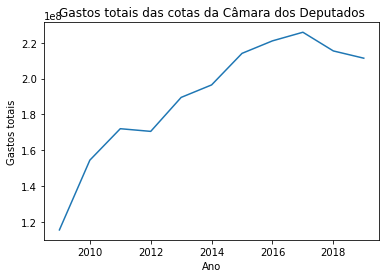

In [9]:
#Um gráfico ilustrando a evolução dos gastos das cotas da Câmara dos Deputados entre 2009 e 2019.

import matplotlib.pyplot as plt

def plot_gastos_cotas_camera_deputados(ano_inicio, ano_fim):
    anos = range(ano_inicio, ano_fim+1)
    gastos_cotas_camera_deputados = []
    
    for ano in anos:
        gastos_cotas_camera_deputados.append(sum(gasto_total_ano(ano).values()))
        
    plt.plot(anos, gastos_cotas_camera_deputados)
    plt.xlabel("Ano")
    plt.ylabel("Gastos totais")
    plt.title("Gastos totais das cotas da Câmara dos Deputados")
    plt.show()

plot_gastos_cotas_camera_deputados(2009, 2019)

Gastos totais de todos os parlamentares em 2019: 211372517.2299999
[(554380.3499999989, 'Jhonatan de Jesus'), (542487.7599999994, 'Hiran Gonçalves'), (538494.7299999987, 'Edio Lopes'), (537322.0499999996, 'Jéssica Sales'), (537270.7900000005, 'Afonso Motta'), (536138.7499999995, 'Perpétua Almeida'), (520071.4499999996, 'Flaviano Melo'), (519366.11999999994, 'Silas Câmara'), (517847.9799999994, 'Hildo Rocha'), (517074.5200000001, 'João Marcelo Souza'), (515030.7499999994, 'Wellington Roberto'), (514165.2899999999, 'Rafael Motta'), (513995.5399999996, 'Ottaci Nascimento'), (513905.5999999995, 'Zeca Dirceu'), (509452.2999999993, 'André Abdon'), (507624.3999999992, 'Hélio Leite'), (507186.9199999994, 'Vinicius Gurgel'), (507121.80999999936, 'Beto Rosado'), (506993.6800000002, 'Shéridan'), (506729.39999999944, 'Delegado Éder Mauro')]


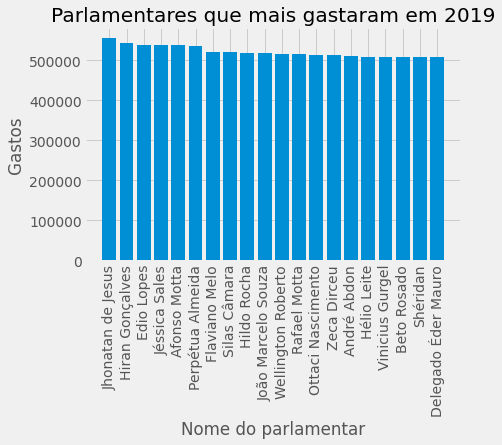

In [17]:
#Um histograma mostrando o total dos 20 parlamentares que mais gastaram em 2019.
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def plot_mais_gastaram(ano):
    dicionario = gasto_total_ano(ano)
    invertida = []
    for chave, valor in dicionario.items():
        invertida.append((valor, chave))
    invertida.sort(reverse=True)
    mais_gastaram = invertida[:20]
    nomes = []
    valores = []
    print(mais_gastaram)
    for valor, nome in mais_gastaram:
        nomes.append(nome)
        valores.append(valor)
    plt.style.use('fivethirtyeight')    
    plt.bar(nomes, valores)
    plt.xticks(rotation=90)
    plt.xlabel("Nome do parlamentar")
    plt.ylabel("Gastos")
    plt.title("Parlamentares que mais gastaram em 2019")
    

plot_mais_gastaram(2019)



{'': 905, 'AVANTE': 3745, 'PSDB': 13744, 'MDB': 20635, 'DEM': 1156, 'PP': 29956, 'PSC': 4430, 'UNIÃO': 27025, 'PODE': 4997, 'PV': 2394, 'PSB': 14493, 'PT': 40696, 'PRB': 531, 'REPUBLICANOS': 21427, 'PTB': 2153, 'PDT': 10853, 'CIDADANIA': 3517, 'PPS': 225, 'PSOL': 4787, 'SOLIDARIEDADE': 3893, 'PSD': 25996, 'PCdoB': 3947, 'PR': 1118, 'PL': 36858, 'PSL': 137, 'PROS': 3045, 'S.PART.': 158, 'REDE': 789, 'PATRI': 154, 'PHS': 139, 'NOVO': 3130, 'PPL': 20, 'PATRIOTA': 2399}
{'': 1017.3099889502756, 'AVANTE': 573.3316608811772, 'PSDB': 720.189550349249, 'MDB': 787.7282078991998, 'DEM': 1008.7270328719717, 'PP': 739.8381482841836, 'PSC': 830.2919277652302, 'UNIÃO': 746.1366797409802, 'PODE': 749.4399519711849, 'PV': 748.7273558897313, 'PSB': 633.4920437452527, 'PT': 604.2504867800554, 'PRB': 1169.674538606403, 'REPUBLICANOS': 850.8800504037065, 'PTB': 995.1258941012599, 'PDT': 751.2100783193649, 'CIDADANIA': 577.4611487062845, 'PPS': 970.7530222222227, 'PSOL': 662.2529663672477, 'SOLIDARIEDADE':

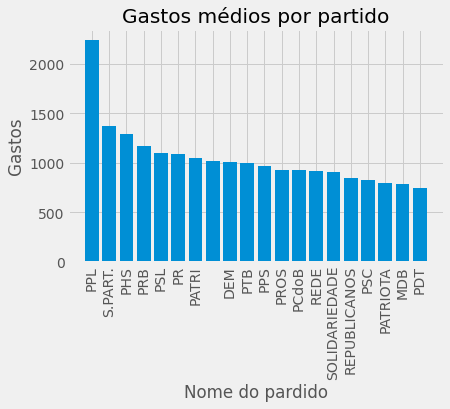

In [18]:
#Um histograma por partido, mostrando os gastos médios de seus parlamentares no ano de 2019.
def plot_gastos_medios_por_partido(ano):
    dicionario = gastos_medios_totais_ano(ano)
    invertida = []
    for chave, valor in dicionario.items():
        invertida.append((valor, chave))
    invertida.sort(reverse=True)
    mais_gastaram = invertida[:20]
    nomes = []
    valores = []
    for valor, nome in mais_gastaram:
        nomes.append(nome)
        valores.append(valor)
        
    plt.style.use('fivethirtyeight')
    plt.bar(nomes, valores)
    plt.xticks(rotation=90)
    plt.xlabel("Nome do pardido")
    plt.ylabel("Gastos")
    plt.title("Gastos médios por partido")
    print(mais_gastaram)
    

plot_gastos_medios_por_partido(2019)

{'NA': 905, 'PE': 14990, 'DF': 1445, 'CE': 10305, 'RR': 2910, 'ES': 4833, 'SP': 44304, 'PI': 4087, 'PA': 8037, 'SE': 3367, 'BA': 22929, 'RJ': 26610, 'PR': 21567, 'RS': 25106, 'MG': 33560, 'GO': 5300, 'SC': 10433, 'MA': 7373, 'AP': 2777, 'AC': 3386, 'PB': 6393, 'AL': 3698, 'AM': 2955, 'RO': 3517, 'TO': 4445, 'MS': 4056, 'RN': 5168, 'MT': 4996}
{'NA': 920665.5399999995, 'PE': 10989237.3399998, 'DF': 1795185.1600000015, 'CE': 10510221.37000014, 'RR': 4115517.9900000235, 'ES': 3652049.540000036, 'SP': 25646417.04000091, 'PI': 4590257.089999993, 'PA': 8026741.859999843, 'SE': 3687619.6000000127, 'BA': 17430621.460000604, 'RJ': 17856044.25000075, 'PR': 12413012.859999903, 'RS': 12470844.49000049, 'MG': 19526675.120001577, 'GO': 5899839.639999953, 'SC': 5463401.040000004, 'MA': 8198348.849999893, 'AP': 4094046.8800000106, 'AC': 4130683.640000017, 'PB': 5505420.949999966, 'AL': 4099385.8800000316, 'AM': 3960143.5500000287, 'RO': 3102359.6100000055, 'TO': 3548072.4900000105, 'MS': 3052895.87000

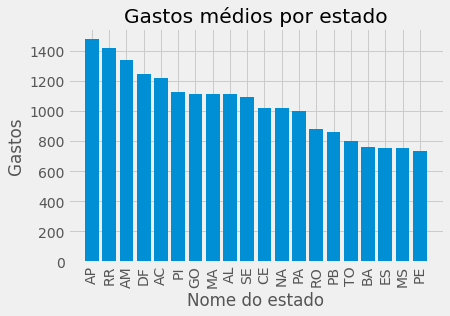

In [19]:
#Um histograma por estado, mostrando os gastos médios de seus parlamentares ano de 2019.
def plot_gastos_medios_por_estado(ano):
    dicionario = gastos_medios_dos_parlamentares_por_estados_ano_especifico(ano)
    invertida = []
    for chave, valor in dicionario.items():
        invertida.append((valor, chave))
    invertida.sort(reverse=True)
    mais_gastaram = invertida[:20]
    nomes = []
    valores = []
    for valor, nome in mais_gastaram:
        nomes.append(nome)
        valores.append(valor)
        
    plt.style.use('fivethirtyeight')
    plt.bar(nomes, valores)
    plt.xticks(rotation=90)
    plt.xlabel("Nome do estado")
    plt.ylabel("Gastos")
    plt.title("Gastos médios por estado")
    print(mais_gastaram)
    
plot_gastos_medios_por_estado(2019)

<li>Houve alguma redução nos gastos com o CEAP nos últimos anos em que o país vive uma crise de arrecadação?</li>
<p> Pelo gráfico de arrecadação observa-se que houve uma redução nos gastos com o CEAP a partir de 2017.</p>
<li>Quais os parlamentares mais caros no exercício de 2019?</li>
<p>(554380.3499999989, 'Jhonatan de Jesus'), (542487.7599999994, 'Hiran Gonçalves'), (538494.7299999987, 'Edio Lopes')</p>
<li>Quais os partidos que, na média, mais "custam" para o Brasil em termos de auxílios a parlamentares?</li>
<p>(2246.2875000000004, 'PPL'), (1375.1105696202542, 'S.PART.'), (1295.3632374100732, 'PHS')</p>
<li>Quais os estados, na média, mais "custam" para o Brasil em termos de auxílios a parlamentares? Pelas regras de liberação dos auxílios para viagem, o esperado é que os estados mais distantes do DF custem mais. </li>
<p>(1474.2696723082502, 'AP'), (1414.267350515472, 'RR'), (1340.1501015228523, 'AM')</p>
</ol>